<a href="https://colab.research.google.com/github/eric-castillo05/emotions-wheel-nlp/blob/main/unilabel/TF_IDF_DecisionTree_spanish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import joblib

In [8]:
with open ('X_test_tfidf.pkl', 'rb') as f:
  X_test = joblib.load(f)


with open ('X_train_tfidf.pkl', 'rb') as f:
  X_train = joblib.load(f)


with open ('y_test_tfidf.pkl', 'rb') as f:
  y_test = joblib.load(f)

with open ('y_train_tfidf.pkl', 'rb') as f:
  y_train = joblib.load(f)

In [9]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4974965 stored elements and shape (16000, 8300)>

In [10]:
y_train

array([4, 4, 0, ..., 2, 0, 4])

In [11]:
from sklearn import tree

In [12]:
clf = tree.DecisionTreeClassifier()

In [13]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
y_pred = clf.predict(X_test)

In [15]:
from sklearn.metrics import classification_report

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2159
           1       1.00      1.00      1.00      1937
           2       1.00      1.00      1.00      5362
           3       1.00      0.99      0.99      1304
           4       1.00      1.00      1.00      4666
           5       1.00      0.99      0.99       572

    accuracy                           1.00     16000
   macro avg       1.00      0.99      1.00     16000
weighted avg       1.00      1.00      1.00     16000



# Confusion Matrix

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

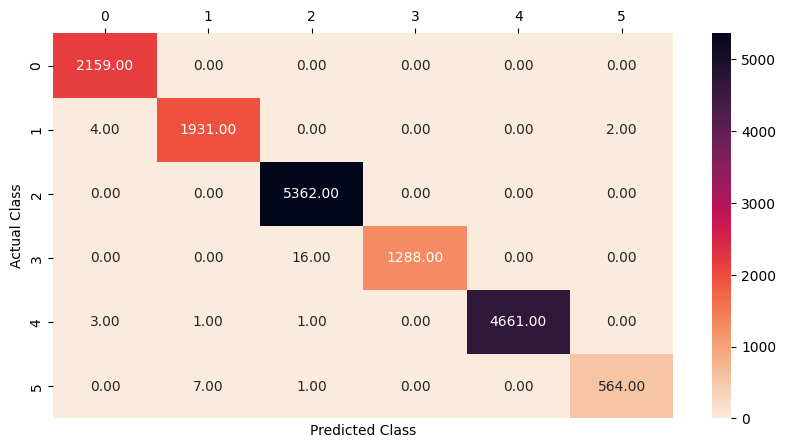

In [25]:
plt.figure(figsize = (10, 5))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), cmap = 'rocket_r', fmt = '.2f', annot = True)
ax.set(xlabel = 'Predicted Class', ylabel = 'Actual Class')
ax.xaxis.tick_top()
plt.show()

# ROC Curve

In [36]:
import joblib

with open ('/content/label_map.pkl', 'rb') as f:
  label_map = joblib.load(f)

In [27]:
from sklearn.metrics import roc_curve, auc

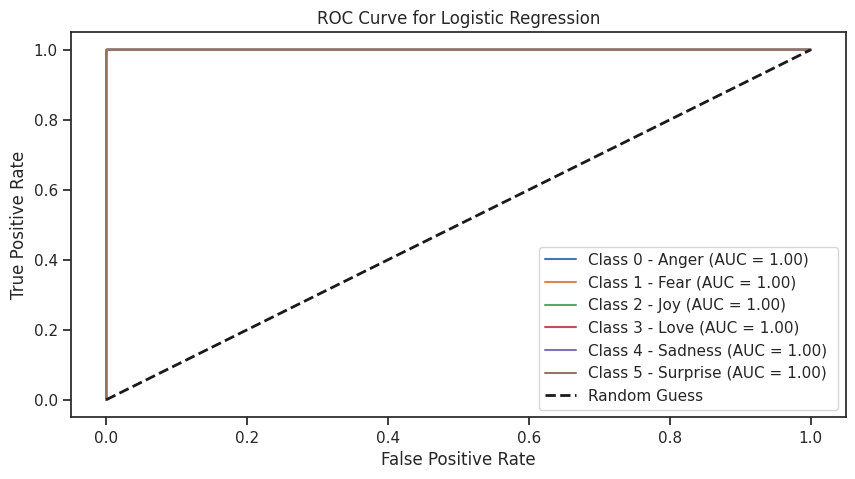

In [43]:
fpr = {}
tpr = {}
roc_auc = {}
sns.set_theme(style = 'ticks')

y_score = clf.predict_proba(X_test)
n_classes = 6

plt.figure(figsize = (10, 5))

for i in range (n_classes):
  y_true_binary = (y_test == i).astype(int)
  y_score_binary = y_score[:, i]

  fpr[i], tpr[i], _ = roc_curve(y_true_binary, y_score_binary)
  roc_auc[i] = auc(fpr[i], tpr[i])
  plt.plot(fpr[i], tpr[i], label = f'Class {i} - {list(label_map.keys())[i].title()} (AUC = {roc_auc[i]:.2f}) ')

plt.plot([0, 1], [0, 1], 'k--', lw = 2, label = 'Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc = 'lower right')
plt.show()